## 기본 모델

In [112]:
df = pd.read_csv('data/result/default_전체_파생변수추가.csv')
data = df[df['상권_구분_코드_명'] != '골목상권']


,매출,기준_년_코드,상권_구분_코드_명,상권_코드,상권_코드_명,점포수,시간대1,시간대2,시간대3,시간대4,...,버스정류장_수,지하철역_수,시간대6_생활인구_비율,주간_생활인구_수,야간_생활인구_수,주중_생활인구_수,주말_생활인구_수,면적당편의점수(10000제곱미터),group_a,group_b
210,145014.0061,2020,발달상권,2120185,논현역,52,1,0,0,0,...,3,1,0.10974,1613398,926230,2385445,709846,1.61902,863,97
211,187745.1767,2020,발달상권,2120185,논현역,52,0,1,0,0,...,3,1,0.10974,1613398,926230,2385445,709846,1.61902,863,97
212,139450.3948,2020,발달상권,2120185,논현역,52,0,0,1,0,...,3,1,0.10974,1613398,926230,2385445,709846,1.61902,863,97
213,120587.3208,2020,발달상권,2120185,논현역,52,0,0,0,1,...,3,1,0.10974,1613398,926230,2385445,709846,1.61902,863,97
214,250239.2580,2020,발달상권,2120185,논현역,52,0,0,0,0,...,3,1,0.10974,1613398,926230,2385445,709846,1.61902,863,97


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4364
[LightGBM] [Info] Number of data points in the train set: 2710, number of used features: 35
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 239755.836344
Training until validation scores don't improve for 41 rounds
Did not meet early stopping. Best iteration is:
[253]	training's rmse: 15733.1	training's l2: 2.47531e

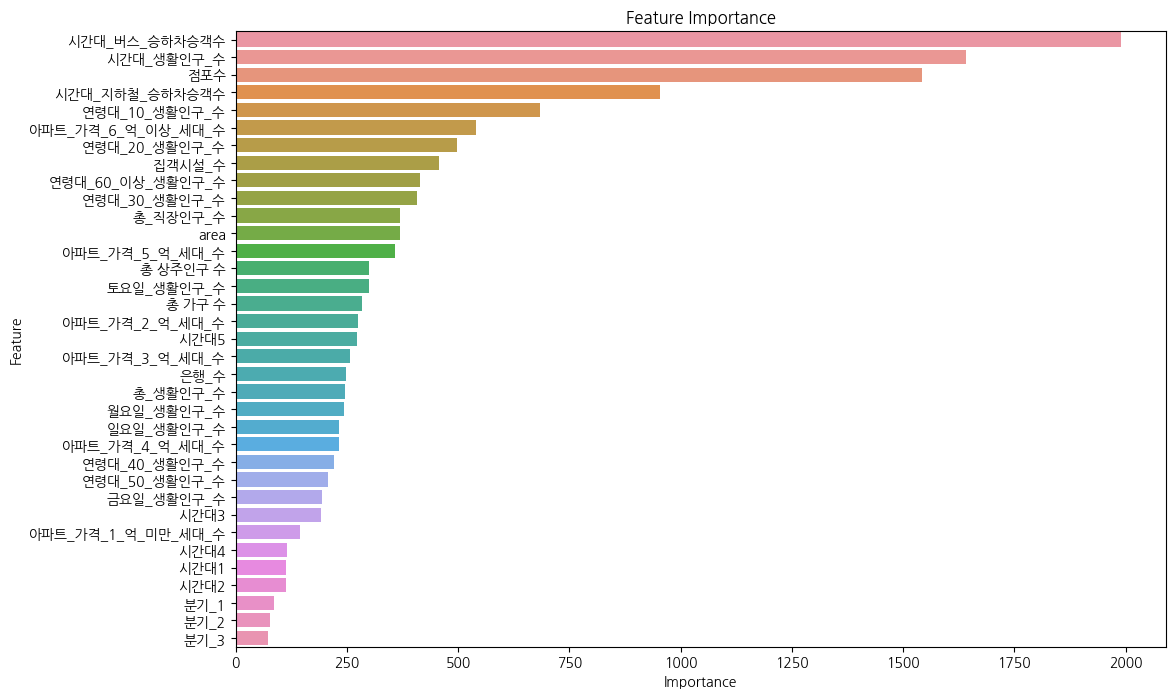

Best Hyperparameters for K-fold CV:
Fold 1: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 2: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 3: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 4: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 5: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 6: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 7: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learnin

In [8]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import KFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

#font 오류 수정
font_list = fm.findSystemFonts()
font_name = None
for font in font_list:
    if 'NanumGothic' in font:
        font_name = fm.FontProperties(fname=font).get_name()
plt.rc('font', family=font_name)

# 데이터 불러오기 및 전처리
data = pd.read_csv('data/result/비골목상권.csv')

# 데이터 분할
X = data[['점포수', '시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_가격_1_억_미만_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수', '시간대_생활인구_수', '월요일_생활인구_수', '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '은행_수','area', '연령대_10_생활인구_수', '연령대_20_생활인구_수','연령대_30_생활인구_수', '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수']]
y = data['매출']

# k-폴드 교차 검증
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []  # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),  # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  # 0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),  # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}

# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]

    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)

    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf), (X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set=evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf, eval_set=evals, eval_metric='rmse')

    # Feature Importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)

    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)

# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# Feature Importance 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns

# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending=False)
print(feature_importance_df)
# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("Best Hyperparameters for K-fold CV:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')
    



In [9]:
print(mean_mae)
print(mean_rmse)

22277.017494961525
36217.0629177972


In [3]:
X.columns

Index(['점포수', '시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수',
       '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수',
       '시간대_생활인구_수', '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', 'area', '연령대_10_생활인구_수', '연령대_20_생활인구_수',
       '연령대_30_생활인구_수', '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수',
       '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수', '지하철역_수'],
      dtype='object')